<h2>1. Perkenalan</h2>
<hr>

<h2>Final Projek 1</h2>
<hr>

Authors dan Creators:

1. Sultan Chisson Obie

<h2>Instruksi</h2>
<hr>

Isi notebook harus mengikuti <b>outline</b> seperti di bawah:

1. Perkenalan
2. Import Libraries
3. Data Loading
4. Data cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Keputusan

<h2>Projek Rubrik</h2>
<hr>

1. Mengimplementasikan model klasifikasi machine learning dengan Sklearn (Logistic Regression)
2. Mengimplementasikan dan menganalisa confusion matrix
3. Menganalisa data setidaknya dengan 2 tipe grafik (Visualisasi)
4. Preprocessing data sebelum melakukan pengolahan lebih lanjut
5. Tanpa error
6. Tertata dengan baik (markdown) setiap kode
7. Analisis algoritma yang digunakan

<h2>Dataset (Uber and Lyft Dataset Boston, MA)</h2>
<hr>

Dataset yang dipakai bernama <b>Uber and Lyft Dataset Boston, MA</b> yang diperoleh dari https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma. Dataset ini berisi kumpulan data informasi tentang perjalanan rideshare yang dilakukan di Boston, Massachusetts, Amerika Serikat. Dataset ini terdiri dari 693071 baris dan 57 kolom. 

<h4>Deskripsi Atribut</h4>

1. id
2. timestamp
3. hour
4. day
5. month
6. datetime
7. timezone
8. source: destinasi awal
9. destination: destinasi akhir
10. cab_type: tipe transportasi (uber / lyft)
11. … dan lainnya

<h3>Objektif yang ingin dicapai</h3>
<hr>

1. Mampu memahami konsep regression dengan Linear Regression
2. Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
3. Mampu mengimplementasikan Linear Regression untuk membuat prediksi

<h2>2. Import libraries</h2>
<hr>

In [1]:
# Data Manipulasi dan Analisis
import pandas as pd
import numpy as np

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning dan Pemodelan
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

# Lainnya
import warnings
warnings.filterwarnings("ignore")

<h2>3. Data Loading</h2>
<hr>

In [2]:
# deteksi berbagai format non standard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' - ']

# read dataset
df = pd.read_csv('./Dataset/rideshare_kaggle.csv', na_values=missing_values)

# menampilkan tampilan kolom full
pd.set_option('display.max_columns', 500)

# menampilkan dataset
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

In [3]:
# melihat dimensi dataset
df.shape

(693071, 57)

In [4]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

<h2>4. Data Cleaning</h2>
<hr>

In [5]:
# menampilkan apakah di setiap attribute ada missing value dengan tampilan boolean (true/false)
df.isna().any()

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                           True
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

In [6]:
# menampilkan jumlah missing value pada dataset
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [7]:
# menghapus missing value pada kolom price
df = df[df['price'].notna()].reset_index(drop=True)

# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [8]:
# melihat apakah ada data duplikat pada dataset
df.duplicated().sum()

0

<h2>5. Explorasi Data</h2>
<hr>

<AxesSubplot:xlabel='price'>

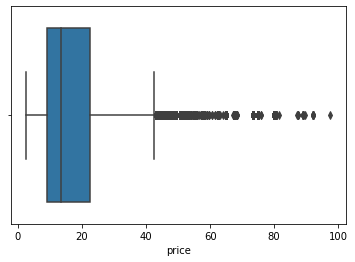

In [9]:
# melihat apakah ada outlier pada kolom price dengan tampilan visualisasi boxplot
sns.boxplot(df['price'])

In [10]:
# print shape lama dari dataset yang belum di handling outliernya
print("Bentuk Shape Lama: ", df.shape)

# IQR
# Kalkulasi batas atas dan bawah
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# membuat array dengan nilai boolean yang menunjukkan baris-baris yang merupakan outlier
upper_array = np.where(df['price']>=upper)[0]
lower_array = np.where(df['price']<=lower)[0]
 
# menghapus outlier
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# print shape baru dari dataset yang sudah di handling outliernya
print("Bentuk Shape Baru: ", df.shape)

Bentuk Shape Lama:  (637976, 57)
Bentuk Shape Baru:  (632387, 57)


<AxesSubplot:xlabel='price'>

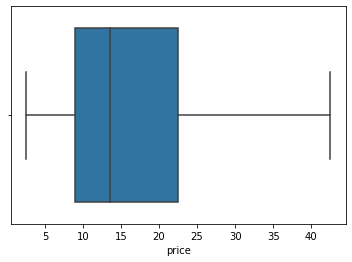

In [11]:
# melihat apakah ada outlier pada kolom price dengan tampilan visualisasi boxplot
sns.boxplot(df['price'])

In [12]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632387 entries, 0 to 637975
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           632387 non-null  object 
 1   timestamp                    632387 non-null  float64
 2   hour                         632387 non-null  int64  
 3   day                          632387 non-null  int64  
 4   month                        632387 non-null  int64  
 5   datetime                     632387 non-null  object 
 6   timezone                     632387 non-null  object 
 7   source                       632387 non-null  object 
 8   destination                  632387 non-null  object 
 9   cab_type                     632387 non-null  object 
 10  product_id                   632387 non-null  object 
 11  name                         632387 non-null  object 
 12  price                        632387 non-null  float64
 13 

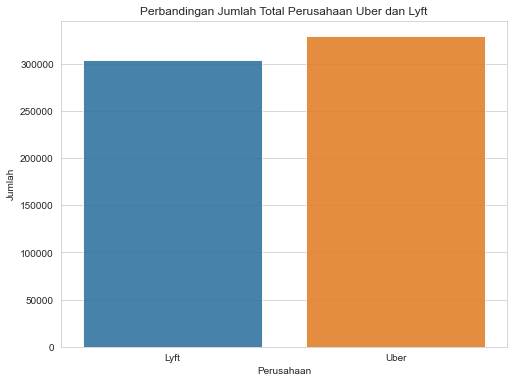

In [13]:
# memfilter dataset untuk Uber dan Lyft
df_cab = df.loc[(df['cab_type'] == 'Uber') | (df['cab_type'] == 'Lyft')]

# menghitung jumlah total perusahaan Uber dan Lyft
counts = df.groupby('cab_type')['distance'].count()

# menampilkan grafik bar
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(counts.index, counts.values, alpha=0.9)
plt.title('Perbandingan Jumlah Total Perusahaan Uber dan Lyft')
plt.ylabel('Jumlah')
plt.xlabel('Perusahaan')
plt.show()

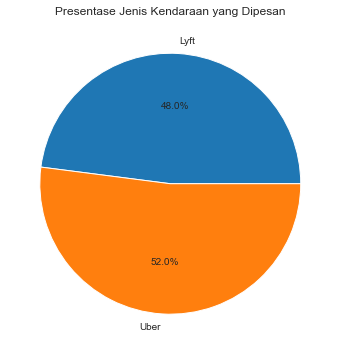

In [14]:
# menghitung jumlah total kendaraan yang dipesan untuk setiap jenis kendaraan
counts = df.groupby('cab_type')['distance'].count()

# menghitung presentase dari setiap jenis kendaraan
percentages = counts / counts.sum() * 100

# menampilkan grafik pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%')
plt.title('Presentase Jenis Kendaraan yang Dipesan')
plt.show()

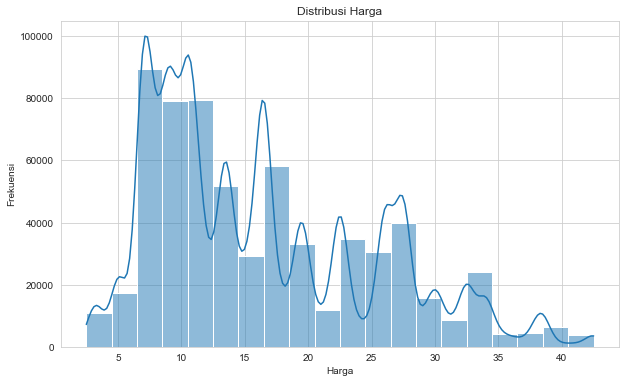

In [15]:
# Mengatur ukuran gambar untuk plot
plt.figure(figsize=(10, 6))

# Membuat histogram distribusi harga menggunakan seaborn
sns.histplot(data=df, x='price', bins=20, kde=True)

# Menambahkan judul plot
plt.title('Distribusi Harga')

# Menambahkan label sumbu x
plt.xlabel('Harga')

# Menambahkan label sumbu y
plt.ylabel('Frekuensi')

# Menampilkan plot histogram
plt.show()

<h2>6. Data Preprocessing</h2>
<hr>

In [16]:
# membuat perubahan variabel untuk menyimpan kolom-kolom yang akan digunakan untuk proses preprocessing dan proses selanjutnya
df = df[['cab_type', 'name', 'price', 'distance', 'surge_multiplier']]

# menampilkan dataset
df

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...
637971,Uber,WAV,9.5,1.00,1.0
637972,Uber,UberXL,13.0,1.00,1.0
637973,Uber,UberX,9.5,1.00,1.0
637974,Uber,Black SUV,27.0,1.00,1.0


In [17]:
# menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632387 entries, 0 to 637975
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          632387 non-null  object 
 1   name              632387 non-null  object 
 2   price             632387 non-null  float64
 3   distance          632387 non-null  float64
 4   surge_multiplier  632387 non-null  float64
dtypes: float64(3), object(2)
memory usage: 28.9+ MB


In [18]:
# menghitung nilai unik pada kolom cab_type
df.cab_type.value_counts()

Uber    329071
Lyft    303316
Name: cab_type, dtype: int64

In [19]:
# menghitung nilai unik pada kolom name
df.name.value_counts()

WAV             55095
UberX           55093
UberPool        55091
UberXL          55035
Black           55018
Black SUV       53739
Lyft            51235
Shared          51233
Lyft XL         51193
Lux             51119
Lux Black       50666
Lux Black XL    47870
Name: name, dtype: int64

In [20]:
# menampilkan statistik deskriptif dari kolom-kolom numerik pada dataset
df.describe()

,price,distance,surge_multiplier
count,632387.000000,632387.000000,632387.000000
mean,16.245314,2.172208,1.012224
std,8.769536,1.116478,0.083163
min,2.500000,0.020000,1.000000
25%,9.000000,1.270000,1.000000
50%,13.500000,2.140000,1.000000
75%,22.500000,2.900000,1.000000
max,42.500000,7.860000,3.000000


In [21]:
# menampilkan statistik deskriptif dari kolom-kolom objek pada dataset
df.describe(include = 'object')

,cab_type,name
count,632387,632387
unique,2,12
top,Uber,WAV
freq,329071,55095


In [22]:
# melakukan operasi one hot encoding meribah variabel kategorikal ke numerik
df = pd.get_dummies(df)

# menampilkan 5 data teratas dari dataset yang sudah dilakukan operasi one hot encoding
df.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [23]:
# buat variabel x berisi semua kolom-kolom yang ada kecuali kolom price
X = df.drop(columns = 'price')

# buat variabel y berisi kolom price
y = df['price']

In [24]:
# membuat data latih dan data uji dengan indikasi 30% ke data uji 70% ke data latih 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

<h2>7. Pendefinisian Model</h2>
<hr>

In [25]:
# membuat objek model regresi linear dengan library scikit-learn
model = LinearRegression()

<h2>Linear Regression</h2>

Linear regression adalah salah satu algoritma yang digunakan data science dan tergolong pada algoritma supervised learning. Algoritma ini menggunakan prinsip regresi. Regresi membuat model prediksi untuk target variabel berdasarkan dari variabel bebasnya. Jenis algoritma ini sering digunakan untuk mencari hubungan antara variabel-variabel yang ada dan prediksinya. Sehingga pada linear regression, ditujukan untuk melakukan prediksi pada variabel terikat (y) berdasarkan variabel bebas yang diberikan (x). Hasil akhirnya berupa hubungan linear antara variabel input (x) dengan variabel output(y).

<h2>Alasan Memilih Linear Regression</h2>

Dalam pendefinisian model kami menggunakan model linear regression untuk memprediksi price. Alasan kami menggunakan linear regression dikarenakan kecepatan komputasi yang dimiliki regresi linear relatif cepat dalam memproses dataset yang besar dalam proyek yang kami kerjakan ini serta juga karena memiliki keakuratan yang akurat dan hasil yang memadai.

<h2>8. Pelatihan Model</h2>
<hr>

In [26]:
# melatih machine learning menggunaka data penelitian
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# melakukan prediksi nilai target y berdasarkan fitur-fitur x pada dataset uji X_test
y_pred = model.predict(X_test)

<h2>9. Evaluasi Model</h2>
<hr>

In [28]:
# Menghitung MAE
print(f'MAE dari model Linear Regression adalah {mean_absolute_error(y_test, y_pred)}')

# Menghitung MAPE
print(f'MAPE dari model Linear Regression adalah {mean_absolute_percentage_error(y_test, y_pred)}')

# Menghitung R2
print(f'R2 dari model Linear Regression adalah {r2_score(y_test, y_pred)}')

# Menghitung MSE
print(f'MSE dari model Linear Regression adalah {mean_squared_error(y_test, y_pred)}')

# Menghitung RMSE
print(f'RMSE dari model Linear Regression adalah {np.sqrt(mean_squared_error(y_test, y_pred))}')

MAE dari model Linear Regression adalah 1.6816979668853806
MAPE dari model Linear Regression adalah 0.1298220160278885
R2 dari model Linear Regression adalah 0.9329926552615093
MSE dari model Linear Regression adalah 5.157589685708176
RMSE dari model Linear Regression adalah 2.2710327354990234


<h2>10. Model Inference</h2>
<hr>

In [29]:
# membuat salinan dari dataset yang ada dan menyimpan di variabel baru X_to_test
X_to_test = df.copy()

In [30]:
# menghitung jumlah missing value pada dataset X_to_test
X_to_test.isna().sum()

price                0
distance             0
surge_multiplier     0
cab_type_Lyft        0
cab_type_Uber        0
name_Black           0
name_Black SUV       0
name_Lux             0
name_Lux Black       0
name_Lux Black XL    0
name_Lyft            0
name_Lyft XL         0
name_Shared          0
name_UberPool        0
name_UberX           0
name_UberXL          0
name_WAV             0
dtype: int64

In [31]:
# menampilkan 10 data teratas pada dataset X_to_test
X_to_test.head(10)

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,16.5,0.44,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
6,10.5,1.08,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7,16.5,1.08,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8,3.0,1.08,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
9,27.5,1.08,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [32]:
# dictionary berisi value attribut yang akan digunakan untuk inferensi atau prediksi
to_inference = {'cab_type_Lyft' : [1, 0],
                'cab_type_Uber' : [0,1],
                'name_Lyft XL' : [1, 0],
                'name_UberXL' : [0, 1],
                'distance' : [1, 1],
                'surge_multiplier' : [1, 1]}

In [33]:
# membuat Dataset dari dicionary to_inference
pd.DataFrame(to_inference)

,cab_type_Lyft,cab_type_Uber,name_Lyft XL,name_UberXL,distance,surge_multiplier
0,1,0,1,0,1,1
1,0,1,0,1,1,1


In [34]:
# menggabungkan dataset X_to_test dengan dataset dictionary to_inference
X_to_test = pd.concat([X_to_test, pd.DataFrame(to_inference)], ignore_index = True)

In [35]:
# menampilkan dataset X_to_test
X_to_test

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0,0.0
1,11.0,0.44,1.0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
2,7.0,0.44,1.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0
3,26.0,0.44,1.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0,0.0
4,9.0,0.44,1.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632384,9.5,1.00,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0,0.0
632385,27.0,1.00,1.0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
632386,10.0,1.00,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0,0.0
632387,NaN,1.00,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0,NaN


In [36]:
# menereapkan one hot encoding variabel kategorikal ke numerik pada dataset X_to_test
X_to_test = pd.get_dummies(X_to_test)

# memilih dua baris terakhir dari dataset X_to_test
X_to_test = X_to_test[-2:]

# menampilkan dataset X_to_test
X_to_test

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
632387,NaN,1.0,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0,NaN
632388,NaN,1.0,1.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,NaN


In [37]:
# mengganti nilai missing value dengan 0
X_to_test.fillna(0,  inplace=True)

In [38]:
# drop kolom price pada dataset X_to_test
X_to_test = X_to_test.drop(columns = 'price')

In [39]:
# menampilkan dataset X_to_test
X_to_test

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
632387,1.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0,0.0
632388,1.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.0


In [40]:
# memprediksi nilai price menggunakan model yang telah dilatih sebelumnya
price = model.predict(X_to_test)

In [41]:
# menampilkan hasil prediksi price perbandingan harga Uber tipe UberXL dan Lyft tipe Lyft XL dengan distance keduanya 1 dan surge_multiplier 1
price

array([11.61010742, 12.46044922])

<h2>11. Kesimpulan</h2>
<hr>

1. Dataset yang digunakan dalam proyek ini adalah "Uber and Lyft Dataset Boston, MA" yang terdiri dari 693071 baris dan 57 kolom. Didalamnya berisi informasi perjalanan rideshare yang dilakukan di Boston, Massachusetts, Amerika Serikat.
2. Berdasarkan grafik bar, diketahui bahwa perbandingan jumlah total perusahaan Uber lebih besar daripada Lyft.
3. Berdasarkan grafik lingkaran, diketahui bahwa persentase pemesanan jenis kendaraan Uber lebih besar daripada Lyft (52%).
4. Berdasarkan histogram, diketahui bahwa tingkat distribusi harga mencapai frekuensi tertinggi (100.000) pada rentang price 5-10 dolar.
5. Hasil analisis regresi linier:
   - Rata-rata kesalahan mutlak (MAE) dari model Linear Regression adalah 1.674800144021568 atau dibulatkan menjadi 1,67.
   - Rata-rata persentase kesalahan mutlak (MAPE) dari model Linear Regression adalah 0.12944523992712598 atau dibulatkan 
     menjadi 0,13.
   - Nilai R-squared (R2) dari model Linear Regression adalah 0.9335937625445669 atau dibulatkan menjadi 0,93.
   - Rata-rata kuadrat kesalahan (MSE) dari model Linear Regression adalah 5.101336282424346 atau dibulatkan menjadi 5,1.
   - Penyimpangan rata-rata kuadrat (RMSE) dari model Linear Regression adalah 2.258613796651465 atau dibulatkan menjadi 2,26.
6. Model berhasil digunakan untuk memprediksi price yaitu dengan hasil price harga Uber tipe UberXL dengan distance 1 dan surge multiplier 1 = 11.61 dan Lyft tipe Lyft XL dengan distance 1 dan surge_multiplier 1 = 12.45.